<center><h1>MINERIA DE DATOS</h1>
<strong>Solucion Taller Agrupación</strong><br />
Francisco José Salamanca<br />
<strong>TEMA</strong> Algoritmos de Agrupación</center>

-------
Práctica correspondiente a Agrupación (modelamiento no supervisado) usando diferentes distancias y similitudes para los algoritmos:

* K-means
* Hierarchical clustering
--------

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## K-means

###Ejemplo 1
Ejecución del algoritmo k-means en un conjunto de datos de juguete de calificaciones de películas

In [1]:
#Se crea el conjunto de datos y se visualiza
import pandas as pd

titulos = ['usuario','El viaje de Chihiro','Star Wars','The Matrix','Advengers','Malefica']
puntajes = [['juan',1,5,5,4,2],['ana',2,4,5,3,2],['luis',2,4,4,5,3],['jorge',4,2,2,3,5],['maría',5,1,2,3,4],['oscar',4,2,1,4,5],['mariana',3,5,5,5,3]]
peliculas = pd.DataFrame(puntajes,columns=titulos)
peliculas

,usuario,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,juan,1,5,5,4,2
1,ana,2,4,5,3,2
2,luis,2,4,4,5,3
3,jorge,4,2,2,3,5
4,maría,5,1,2,3,4
5,oscar,4,2,1,4,5
6,mariana,3,5,5,5,3


Para este conjunto de dtaos los tres primeros usuarios y el últomo les gusta las películas de acción, mientras a los tres usuarios restantes les gusta películas de drama. La idea es aplicar el algoritmo de k-means para encontrar los dos grupos de usuarios con preferencias similares de películas. Es necesario remover la primera columna, correspondiente al usuario, ya que no es importante para la agrupación.

In [2]:
# Se importa los algoritmos de grupación de la libreria de sklearn
from sklearn import cluster

data = peliculas.drop('usuario',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
# La asignación de grupo a cada usuario es visualizada como un objeto dataframe
pd.DataFrame(labels, index=peliculas.usuario, columns=['ID Grupo'])

,ID Grupo
usuario,
juan,0
ana,0
luis,0
jorge,1
maría,1
oscar,1
mariana,0


Los redultados de la agrupación son lo esperado: el algoritmo asignó los tres primeros usuarios y el último al cluster 1, y los otros tres usuarios al cluster 0.

In [ ]:
#Visualización de los centroides de los grupos:

In [3]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,2.000000,4.500000,4.750000,4.250000,2.500000
1,4.333333,1.666667,1.666667,3.333333,4.666667


El grupo 0 corresponde con el perfil del usuario que prefiere las películas de drama, mientras el grupo 1 correponde con el perfil de usuarios que prefiere películas de acción.

Estos centroides son el modelo de agrupación, por lo que pueden ser usados para predecir el perfil de un nuevo usuario de acuerdo a la calificación que le asigne a las películas. Por ejemplo, se tienen las siguientes nuevas calificaciones:

In [4]:
import numpy as np

testData = np.array([[1,4,5,4,2],[5,3,2,2,4],[4,2,3,3,1],[3,3,2,3,3],[4,5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['pedro','marco','liz','nico','ligia']).reshape(-1,1)
cols = peliculas.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,usuario,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica,Cluster ID
0,pedro,1,4,5,4,2,0
1,marco,5,3,2,2,4,1
2,liz,4,2,3,3,1,1
3,nico,3,3,2,3,3,1
4,ligia,4,5,4,1,4,0


### Ejemplo 2
Ejecución del algoritmo k-means a un conjunto de datos sintetico de dos dimensiones numéricas, de 1000 puntos

In [5]:
# Importar funciones y conjunto de datos

import pandas as pd
from sklearn import cluster
#from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv("cluster1.csv")
X["x0"] = [float(str(i).replace(",", "")) for i in X["x0"]]

La función predict asigna clusters a los ejemplos



In [ ]:
# Lee el archivo de puntos

n_clusters = 2
# ejecuta el k-means con k=2
km = cluster.KMeans(n_clusters=2)
km.fit(X)
y = km.predict(X)
X.shape

(500, 2)

In [ ]:
#Lista los centroides de los clusters
km.cluster_centers_


array([[ 8.01615594,  9.85357474],
       [ 4.5061742 , -0.68473232]])

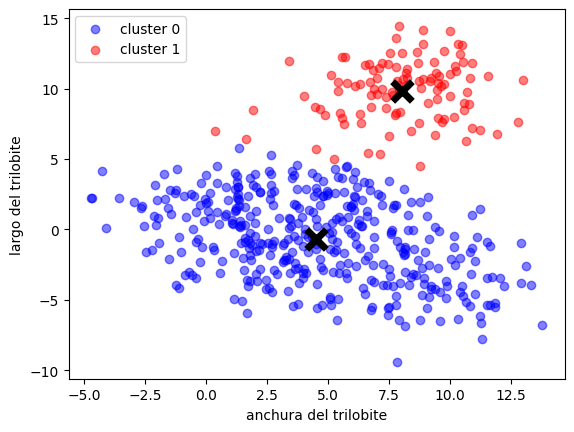

In [ ]:
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr["x0"], Xr["x1"], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

## Iteración del kmeans

Text(0, 0.5, '$x_2$')

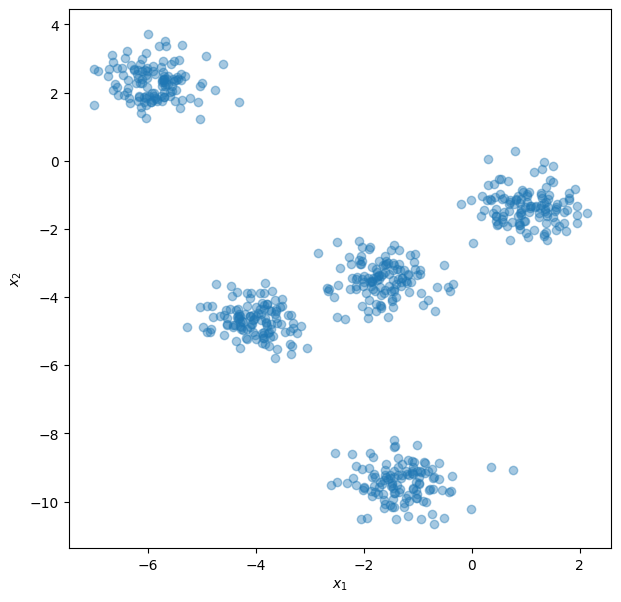

In [ ]:
from sklearn.datasets import make_blobs
np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
X,_=make_blobs(n_samples=600,centers=5, cluster_std=0.5)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(X,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(X.shape[0]),replace=False, size=k)
    clusters=X[init_clus]
    preds=np.argmin(euclidean_distances(X,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=X[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(X,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

all_clusters,all_preds=simple_kmeans(X,5)

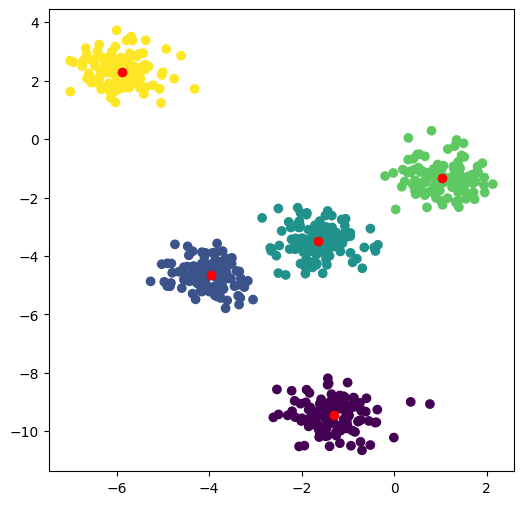

In [ ]:
# Iteración 0. Se realiza la inicialización aleatoriamente, para el ejemplo son 5 puntos,
# y los demas puntos se asignan al cluster más cercano.

iteration=40 #@param {type:"slider", min:0, max:40, step:1}
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")


**Ejercicio 3.**

Usar el algoritmo k-means y distancia Euclidean para agrupar los siguientes puntos en 3

grupos: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). Asumir los centroides iniciales: A1, A4 and A7.

a) Correr una iteración y mostrar: <br />

> 1) Los nuevos grupos <br />

> 2) Los nuevos centroides <br />

b) Iterar más. ¿Cuantas iteraciones se necesita para converger? <br />

c) Mostrar gráficamente (los puntos y centroides) al converger: <br />

> 1) grupos finales <br />
> 2) centroides finales <br />

**Consulta**

1. En que consiste la inicialización kmeans++
2. En que consiste el  Mini Batch K-Means

a)

In [25]:
import numpy as np
import pandas as pd

# Puntos (A1–A8)
points = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9],   # A8
])


# Etiquetas de los puntos
labels_text = ['A1','A2','A3','A4','A5','A6','A7','A8']

# Centroides iniciales: A1, A4, A7
centroids = np.array([
    [2, 10],  # C1
    [5, 8],   # C2
    [1, 2],   # C3
])

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

# 1) Asignar a cada punto su centroide más cercano
distances = np.array([euclidean_distance(points, centroid) for centroid in centroids])
labels = np.argmin(distances, axis=0)

# Mostrar los nuevos grupos
df = pd.DataFrame(points, columns=['x', 'y'])
df['Grupo'] = labels + 1  # Grupo 1 = C1, etc.
print("1) Nuevos grupos:\n")
print(df)

# 2) Calcular nuevos centroides
new_centroids = np.array([
    points[labels == k].mean(axis=0) for k in range(3)
])

print("\n2) Nuevos centroides:\n")
for i, centroid in enumerate(new_centroids, 1):
    print(f"C{i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")


1) Nuevos grupos:

   x   y  Grupo
0  2  10      1
1  2   5      3
2  8   4      2
3  5   8      2
4  7   5      2
5  6   4      2
6  1   2      3
7  4   9      2

2) Nuevos centroides:

C1: (2.00, 10.00)
C2: (6.00, 6.00)
C3: (1.50, 3.50)


b)

In [26]:

max_iters = 10
for i in range(max_iters):
    distances = np.array([euclidean_distance(points, centroid) for centroid in centroids])
    labels = np.argmin(distances, axis=0)

    # Calcular nuevos centroides
    new_centroids = np.array([
        points[labels == k].mean(axis=0) for k in range(3)
    ])

    print(f"Iteración {i + 1}")
    for k in range(3):
        print(f"  C{k+1}: ({new_centroids[k][0]:.2f}, {new_centroids[k][1]:.2f})")

    # Verificar convergencia
    if np.allclose(new_centroids, centroids):
        print(f"\nSe alcanza la convergencia en {i + 1} iteraciones.")
        break

    centroids = new_centroids

Iteración 1
  C1: (2.00, 10.00)
  C2: (6.00, 6.00)
  C3: (1.50, 3.50)
Iteración 2
  C1: (3.00, 9.50)
  C2: (6.50, 5.25)
  C3: (1.50, 3.50)
Iteración 3
  C1: (3.67, 9.00)
  C2: (7.00, 4.33)
  C3: (1.50, 3.50)
Iteración 4
  C1: (3.67, 9.00)
  C2: (7.00, 4.33)
  C3: (1.50, 3.50)

Se alcanza la convergencia en 4 iteraciones.


c)

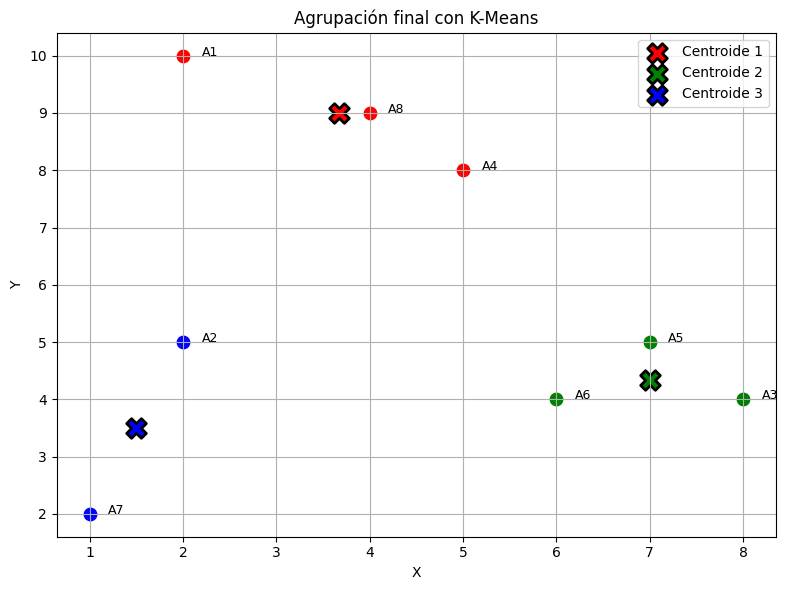

In [27]:
import numpy as np
import matplotlib.pyplot as plt


# Colores para los grupos
colors = ['red', 'green', 'blue']
group_colors = [colors[i] for i in labels]

# Graficar puntos y centroides
plt.figure(figsize=(8, 6))
for i, point in enumerate(points):
    plt.scatter(*point, color=group_colors[i], s=80)
    plt.text(point[0]+0.2, point[1], labels_text[i], fontsize=9)

# Centroides finales
for i, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colors[i], marker='X', s=200, edgecolor='black', linewidth=2, label=f'Centroide {i+1}')

plt.title('Agrupación final con K-Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

d)

I.La inicialización **k-means++** es una mejora del algoritmo k-means normal el cual busca escoger de manera mas optima los centroides iniciales para asi obtener una mejor convergencia. Consta en elegir el primer centroide aleatoriamente, y luego seleccionar los siguientes con una  probabilidad proporcional al cuadrado de la distancia al centroide más cercano que ya habia sido elegido, mejorando asi la calidad de los grupos rsultantes y un algoritmo mucho mas estable.

II. El Mini-Batch K-Means es una variante del algoritmo K-Means diseñada para mejorar la velocidad de entrenamiento al trabajar con conjuntos de datos grandes. A diferencia del K-Means tradicional, que utiliza todos los datos en cada iteración para actualizar los centroides, Mini-Batch K-Means emplea pequeños subconjuntos aleatorios llamados mini-batches. Esta estrategia reduce significativamente el costo computacional y acelera el proceso de agrupamiento, aunque puede implicar una ligera pérdida de precisión en los resultados.

## Determinar el número de k
La distancia intra-cluster mide qué tan compacto es cada cluster, ecisten varias medidas intra-cluster, una de ellas se define como:



$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

k-means minimiza esta medida, y se utiliza para medir la calidad del cluster. El método consiste en  ejecutar varias veces el k-means con diferentes valores de k,  y graficar el valor de la inercia para cda k. La grafica resultante es una curva que desciende (a myor número de grupos menor la inercia). En esta gráfica se busca un valor de k tan pequeño como sea posible y que tenga un valor de la métrica bajo. A este tipo de gráfica se le conoce usualmente como gráfica de codo o *elbow*:

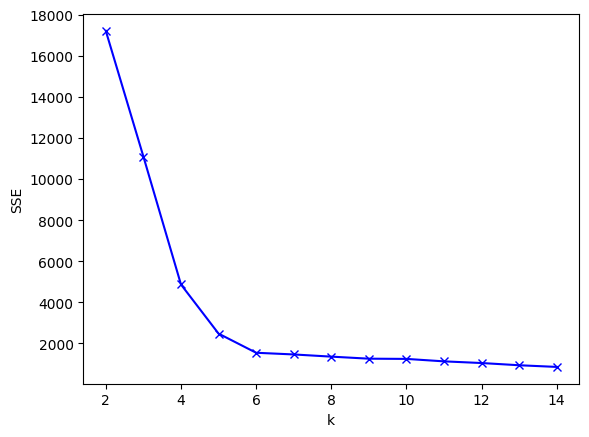

In [ ]:
# Conjunto sintetico
# Se ejecuta Kmeans, para valores de k entre 2 y 15
X,_ = make_blobs(600, cluster_std=1.2, centers=6, random_state=10)

Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


In [ ]:
# Graficamos los clusters, para visualizar los centroides y comparar con la gráfica del codo
#experiment_number_of_clusters(X, KMeans(), show_metric=True)


**Ejercicios:**

**4.**  Calcular la gráfica del codo para el ejemplo 1 (calificaciones de películas)

**5.** Entrenar un modelo K-means con un conjunto de datos en dos dimensiones, realice una exploración del parámetro $K$. Seleccione un valor apropiado (utilizando el método del codo y argumente su decisión.

**6.** Aplicar el algoritmo k-means al conjunto de datos Iris (sin la clase), para k=2,3,4,5,6,7,8. Dibujar la gáfica de Elbow(codo) basada en el SSE. Explique los resultados.


4)

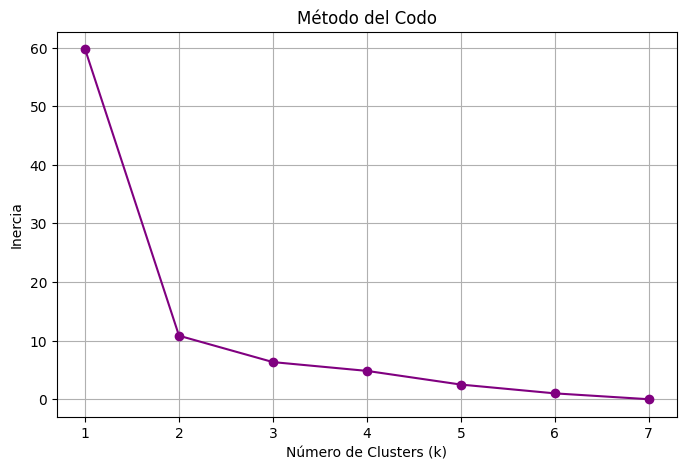

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos
titulos = ['usuario','El viaje de Chihiro','Star Wars','The Matrix','Advengers','Malefica']
puntajes = [
    ['juan',1,5,5,4,2],
    ['ana',2,4,5,3,2],
    ['luis',2,4,4,5,3],
    ['jorge',4,2,2,3,5],
    ['maría',5,1,2,3,4],
    ['oscar',4,2,1,4,5],
    ['mariana',3,5,5,5,3]
]

peliculas = pd.DataFrame(puntajes, columns=titulos)

# Quitamos la columna de usuario para clustering
X = peliculas.drop(columns='usuario')

# Calcular inercia para k de 1 a 7
inertias = []
K_range = range(1, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='-', color='purple')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.xticks(K_range)
plt.show()


5)

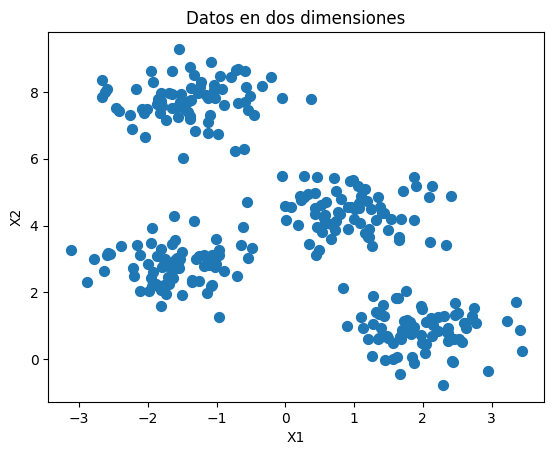

In [31]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear dataset sintético
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Visualización
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos en dos dimensiones")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


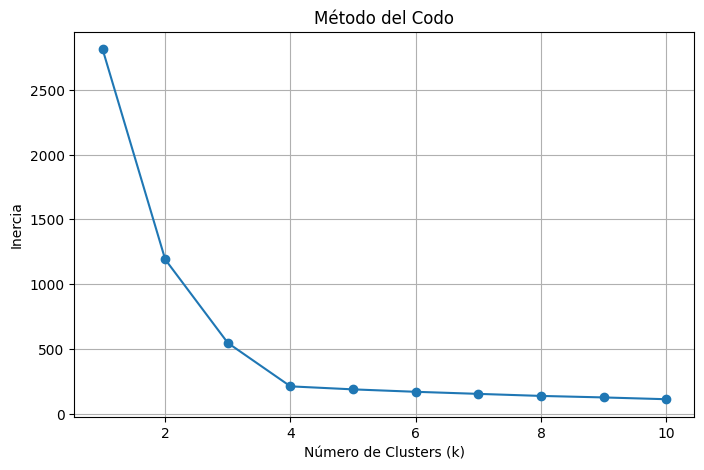

In [32]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


Según la gráfica del codo, el punto donde la curva deja de descender significativamente (el “codo”) ocurre cuando K=4. Esto indica que usar 4 clusters esta bien, ya que agregar más no reduce considerablemente la inercia, pero sí aumenta la complejidad.

6)

Dimensiones del dataset: (150, 4)


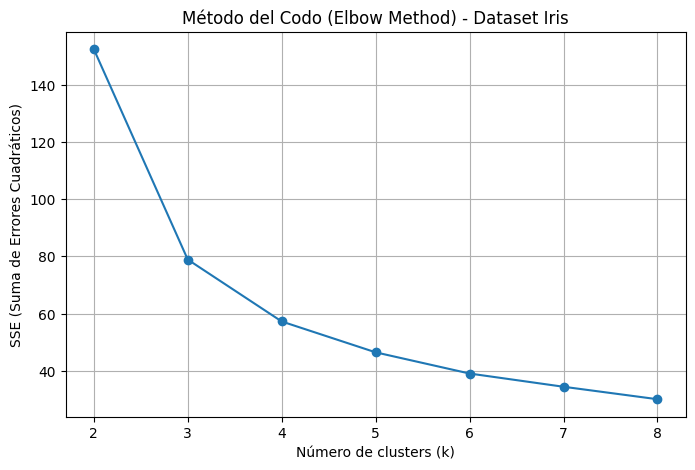

In [33]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos
iris = load_iris()
X = iris.data  # No incluir la clase

# Mostrar dimensiones del dataset
print(f"Dimensiones del dataset: {X.shape}")

# Rango de valores de K
K_range = range(2, 9)
sse = []  # SSE: Sum of Squared Errors (inercia en KMeans)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Guardar la inercia (SSE)


plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.title('Método del Codo (Elbow Method) - Dataset Iris')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Suma de Errores Cuadráticos)')
plt.grid(True)
plt.show()


Al aplicar el algoritmo K-Means al conjunto de datos Iris para valores de
K entre 2 y 8, observamos que el SSE disminuye a medida que aumentamos
K. Sin embargo, la disminución más significativa ocurre entre
K=2 y K=3. Luego de K=3, la mejora en la inercia es cada vez menor.

Se puede decir que K=3 es un valor apropiado para el número de clusters, lo cual coincide con la estructura real del dataset Iris, que tiene 3 clases (setosa, versicolor y virginica).

## Hierarchical Clustering



###Ejemplo1
Usaremos un dataset de vertebrados (ejemplo de TAN) usado para clasificación. Se ejecutaran los tres algoritmos clásicos de agrupacion jerarquica aglomerativa: **single link (MIN), complete link (MAX), y  group average**, usando scipy library de python.



In [ ]:
import pandas as pd
data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
# importamos las librerías
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
# Se eliminan la columna de nombre y la clase
X = data.drop(['Name','Class'],axis=1)

###Single Link (MIN)

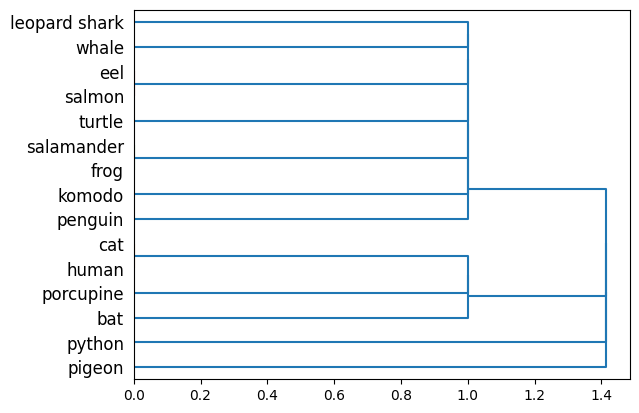

In [ ]:
Z = hierarchy.single(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(), orientation='right')

###Complete Link (MAX)

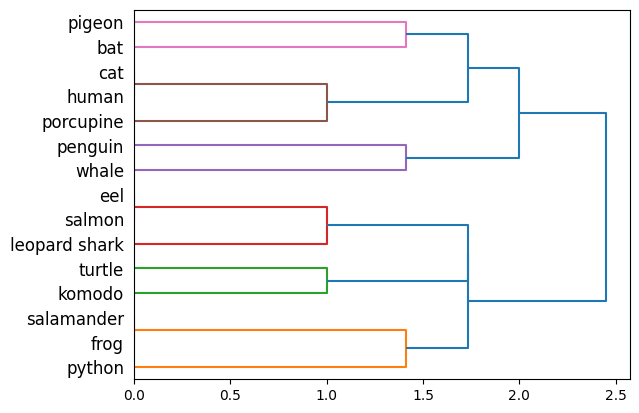

In [ ]:
Z = hierarchy.complete(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Average - Promedio

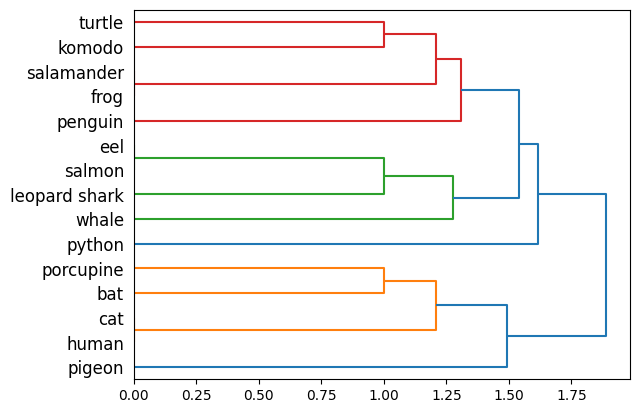

In [ ]:
Z = hierarchy.average(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Ward

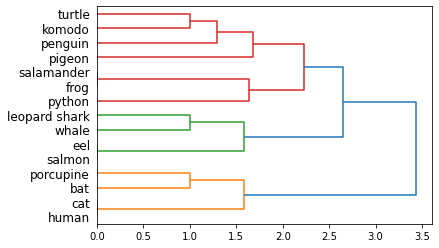

In [ ]:
Z = hierarchy.ward(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Ejercicio 1**

¿Qué concluye de los cuatro métodos? con respecto al conjunto de datos usado.

Se observa que **Single link,** tiende a formar cadenas al unir grupos por el par de elementos mas cercano, es decir, si tiene atributos dercanos en comun, los puede unir, lo cual puede a llegar a no ser representativo.

En **Complete Link,** se usa una mayor distancia que en SL, por lo que se obserban crupos mas compactos, agrupando por organismos con funciones parecidad como volar o nadar.


En **Average link** al calcularse la media de las distancias entre todos los pares de elementos entre grupos, se genera un mejor balance y da mejores agrupaciones, en este caso por grandes grupos de seres vivos como mamiferos, reptiles etc.


Finalmente en el **Ward** minimiza la varianza intra cluster en la union de los grupos, aun que muestra inconsistencias en la agrupacion como en la paloma.

**Ejercicio 2**

Dado un conjunto de ejemplos categóricos de 5 dimensiones:


In [34]:
from scipy.spatial import distance

X = np.array([
              [ 1,0,1,1,0],
              [ 1,1,0,1,0],
              [ 0,0,1,1,0],
              [ 0,1,0,1,0],
              [ 1,0,1,1,0],
              [ 0,1,1,0,0],
             ])
X

array([[1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0]])

a) Aplique agrupamiento jerárquico aglomerativo, usando:

1) Medida intercluster enlace simple (single link o MIN) basado en el coeficiente de Rao. Diagramar el dendograma

2) Medida intercluster enlace completo (complete link o MAX) basado en coeficiente de corres-pondencia simple CCS (su sigla en inglés, SMC Simple Matching Coeficient). Diagramar el dendograma

b) ¿Es posible usar el método de Ward? Explique.

a1)

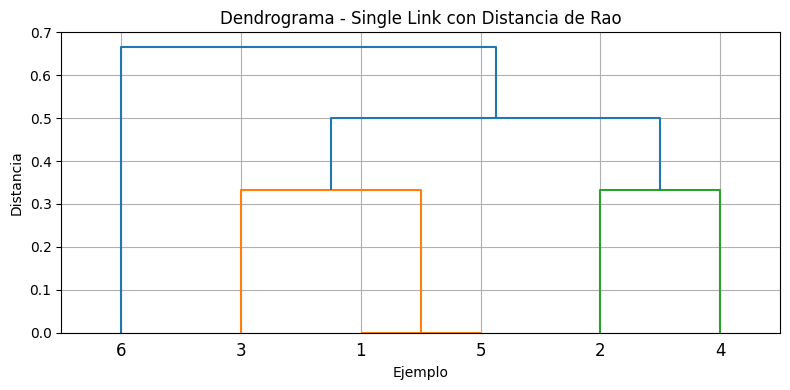

In [35]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Función para coeficiente de Rao
def rao(u, v):
    a = np.sum((u == 1) & (v == 1))
    b = np.sum((u == 1) & (v == 0))
    c = np.sum((u == 0) & (v == 1))
    # No se cuenta 'd'
    return (b + c) / (a + b + c) if (a + b + c) != 0 else 0


# Calcular matriz de distancias con Rao
rao_dist = pdist(X, metric=rao)

# Enlace simple
linked_single_rao = linkage(rao_dist, method='single')

# Dendrograma
plt.figure(figsize=(8, 4))
dendrogram(linked_single_rao, labels=np.arange(1, 7))
plt.title('Dendrograma - Single Link con Distancia de Rao')
plt.xlabel('Ejemplo')
plt.ylabel('Distancia')
plt.grid(True)
plt.tight_layout()
plt.show()

a2)

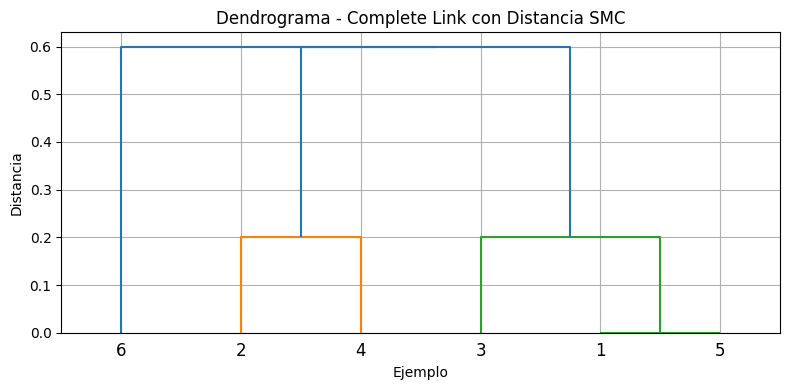

In [36]:
# Función para Simple Matching Coefficient
def smc(u, v):
    a = np.sum((u == 1) & (v == 1))
    d = np.sum((u == 0) & (v == 0))
    total = len(u)
    return 1 - (a + d) / total

# Calcular matriz de distancias con SMC
smc_dist = pdist(X, metric=smc)

# Enlace completo
linked_complete_smc = linkage(smc_dist, method='complete')

# Dendrograma
plt.figure(figsize=(8, 4))
dendrogram(linked_complete_smc, labels=np.arange(1, 7))
plt.title('Dendrograma - Complete Link con Distancia SMC')
plt.xlabel('Ejemplo')
plt.ylabel('Distancia')
plt.grid(True)
plt.tight_layout()
plt.show()


2. No seria posible, pues se requieren datos continuos, para poder minimizar la varianza intra cluster

**Ejercicio 3**

Usar el conjunto de datos [“Perfume Data Data Set”](https://archive.ics.uci.edu/ml/datasets/Perfume+Data#) del repositorio UCI (Machine Learning), para:
- Aplicar los algoritmos: single link, complete link average ling y Ward. Graficar dendogramas y explicar resultados.
- Aplicar PCA y nuevamente aplicar los algoritmos y graficar los dendogramas.

In [45]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

df = pd.read_excel('perfume_data.xlsx', index_col=0)  # 560 muestras × 28 características

X = df.values  # valores numéricos


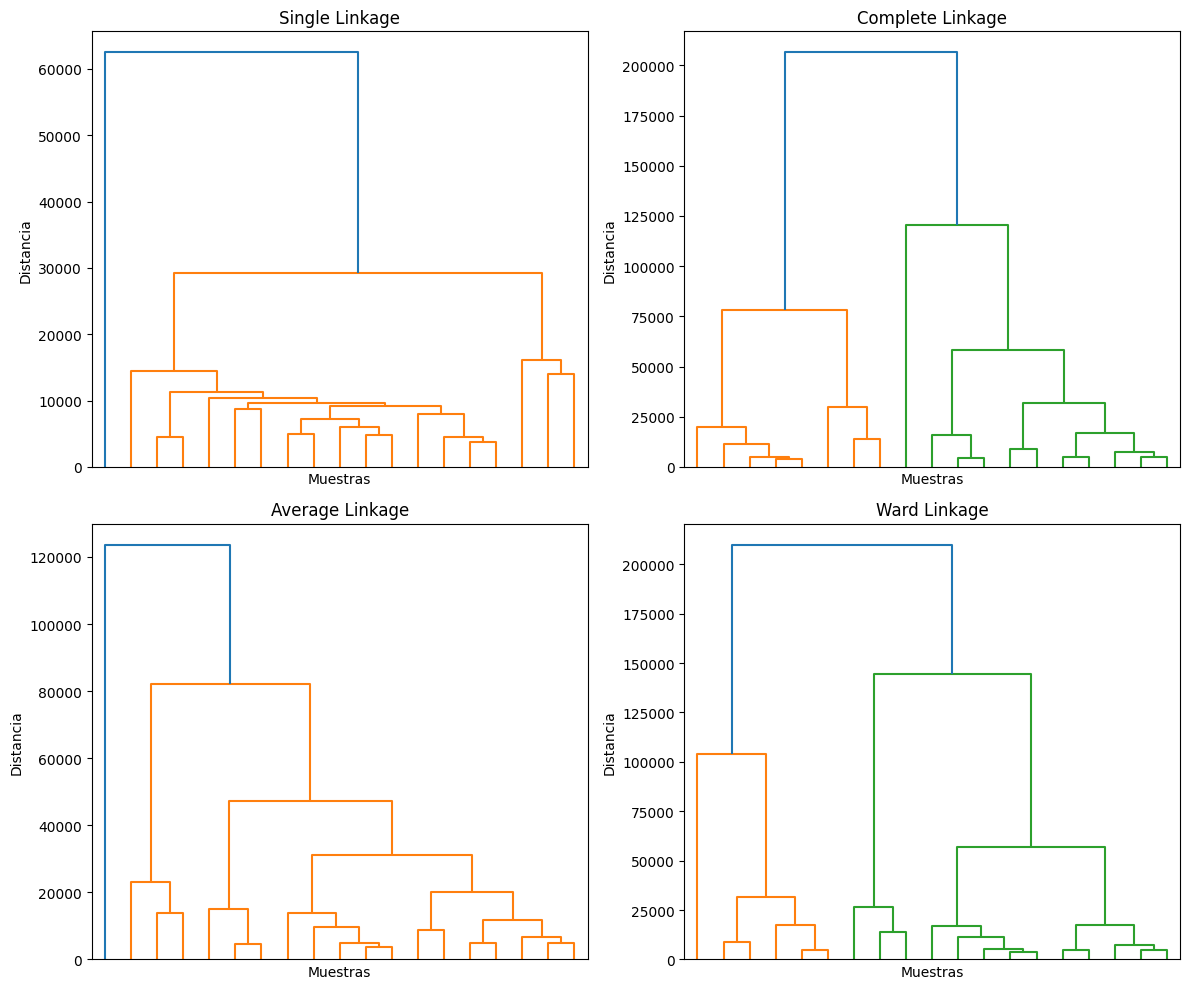

In [41]:
methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(12, 10))

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X, method=method)
    dendrogram(Z, no_labels=True, color_threshold=None)
    plt.title(f'{method.title()} Linkage')
    plt.xlabel('Muestras')
    plt.ylabel('Distancia')
plt.tight_layout()
plt.show()


En single linkage se observan uniones de puntos mediante la menor distancia posible, haciendo clusters poco informativos

En complete se ven mejores agrupamientos, mucho mas compactos,

En el promedio se ve un sesgo hacia una sola clase.

En el Ward hay un buen desempeño debido a que los datos son numericos.

In [42]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA: reducir a 2 componentes para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


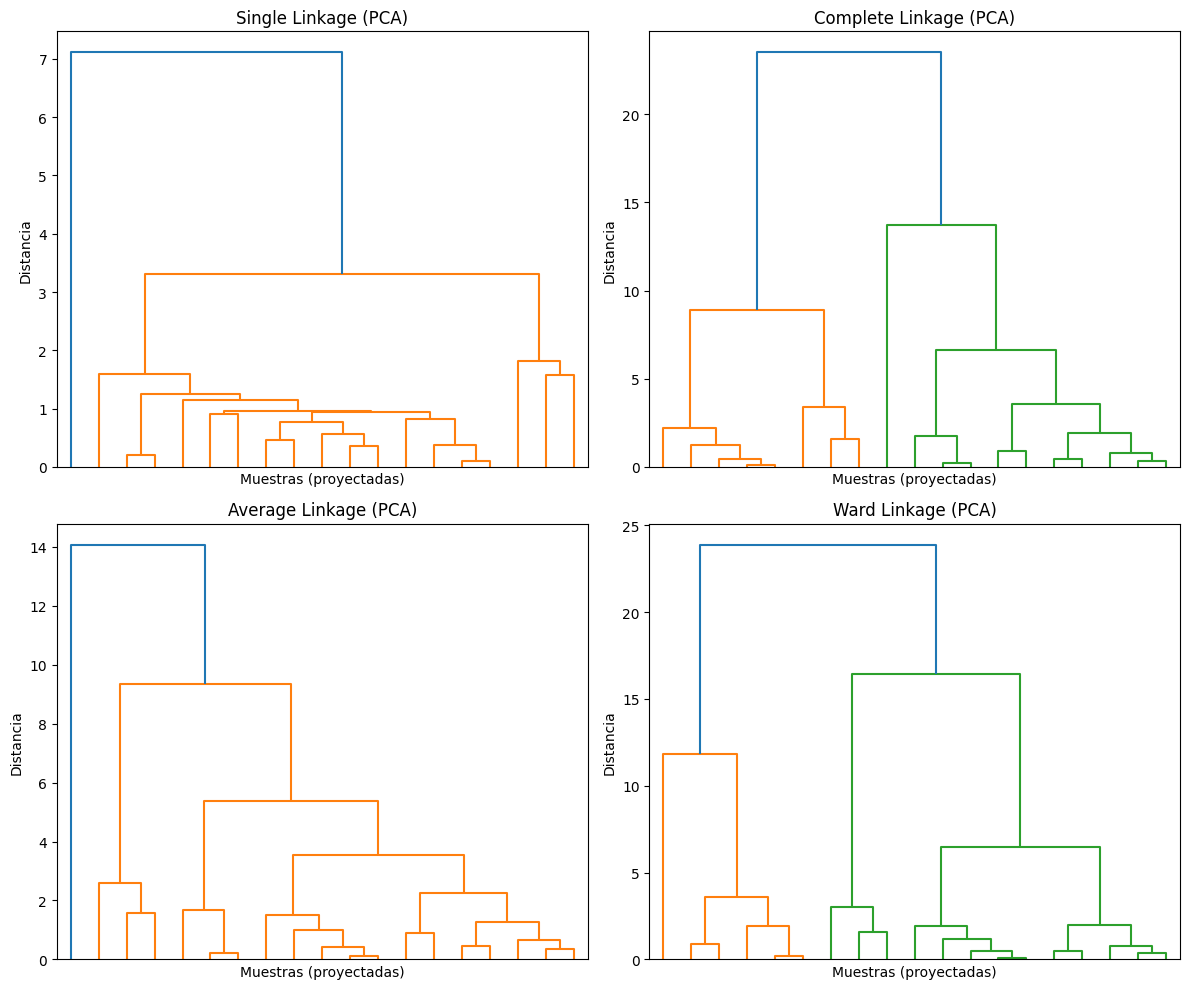

In [43]:
methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(12, 10))

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X_pca, method=method)
    dendrogram(Z, no_labels=True)
    plt.title(f'{method.title()} Linkage (PCA)')
    plt.xlabel('Muestras (proyectadas)')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.show()



**Ejercicio 4**

Usar el data set creado en la sección "Determinar el número de K" y construya un dendograma con distancia euclidiana (from sklearn.metrics.pairwise import euclidean_distances), y otro con similitud coseno (puede utilizar la función de scikit-learn [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)). Discuta los resultados.

In [46]:
import pandas as pd
import numpy as np

# Dataset
titulos = ['usuario','El viaje de Chihiro','Star Wars','The Matrix','Advengers','Malefica']
puntajes = [['juan',1,5,5,4,2],
            ['ana',2,4,5,3,2],
            ['luis',2,4,4,5,3],
            ['jorge',4,2,2,3,5],
            ['maría',5,1,2,3,4],
            ['oscar',4,2,1,4,5],
            ['mariana',3,5,5,5,3]]
df = pd.DataFrame(puntajes, columns=titulos)

# Convertimos las calificaciones a matriz numérica
X = df.drop('usuario', axis=1).astype(float).values
usuarios = df['usuario']


<ipython-input-47-1968624642>:11: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_euclidean = linkage(D_euclidean, method='average')


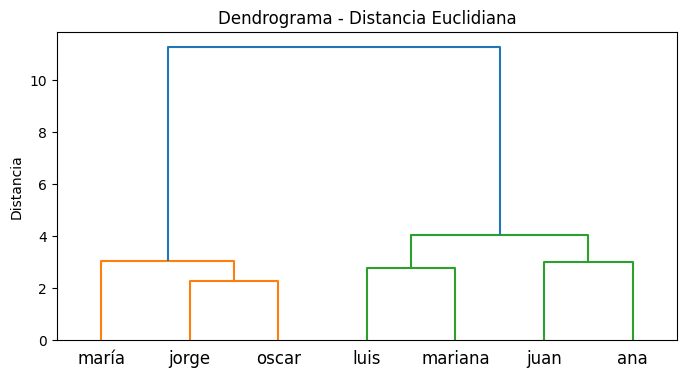

In [47]:
#Con distancia Euclidiana

from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Matriz de distancias euclidianas
D_euclidean = euclidean_distances(X)

# Dendograma
Z_euclidean = linkage(D_euclidean, method='average')

plt.figure(figsize=(8, 4))
dendrogram(Z_euclidean, labels=usuarios.to_list())
plt.title('Dendrograma - Distancia Euclidiana')
plt.ylabel('Distancia')
plt.show()


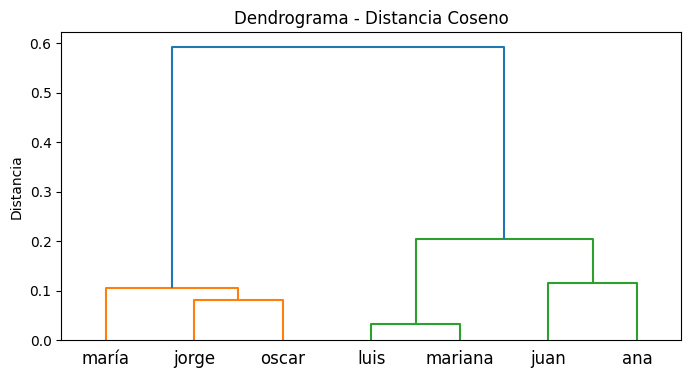

In [48]:
#Con Similitud Coseno

from sklearn.metrics.pairwise import cosine_similarity

# Similitud coseno → convertir a distancia
D_cosine = 1 - cosine_similarity(X)

# Dendograma
Z_cosine = linkage(D_cosine, method='average')

plt.figure(figsize=(8, 4))
dendrogram(Z_cosine, labels=usuarios.to_list())
plt.title('Dendrograma - Distancia Coseno')
plt.ylabel('Distancia')
plt.show()


La diferencia es que al usar uclidiana se tiene encuenta la magnitud de las caificaciones, por lo que agrupa con puntajes cercanos, mientras que con coseno, mide la orientacion o el patron de las preferencias, por lo que podriamos decir que agrupa a los usuarios mefiante gustos similares, asi hayan usado escalas distintas. en los Dendogramas se obserba asi que se acortan las distancias entre los usuarios.

Si se quiere agrupar mediante gustos similares, es mejor usar coseno

## K-Nearest Neighbor

**Ejercicio 1**

Crear un conjunto sintetico de 5 clusters:

Text(0, 0.5, '$x_2$')

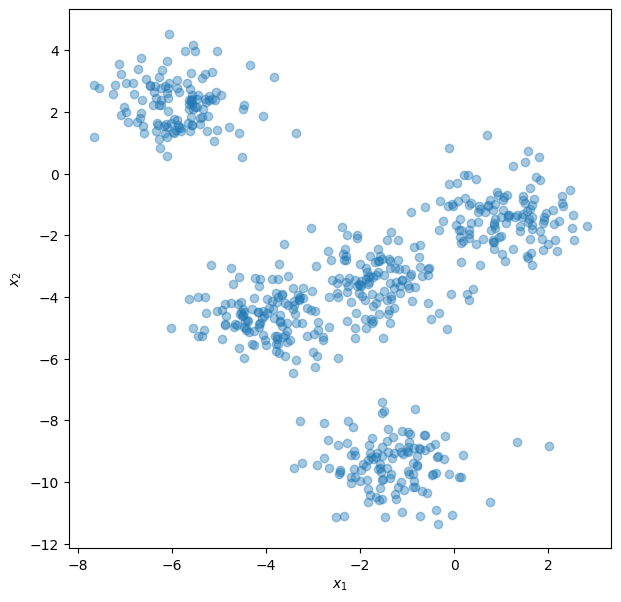

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
X,_=make_blobs(n_samples=600,centers=5, cluster_std=0.8)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Usar el algoritmo de K-Nearest Neighbor y distancia Euclidean para agrupar los datos. Probar con varios valores de umbral.

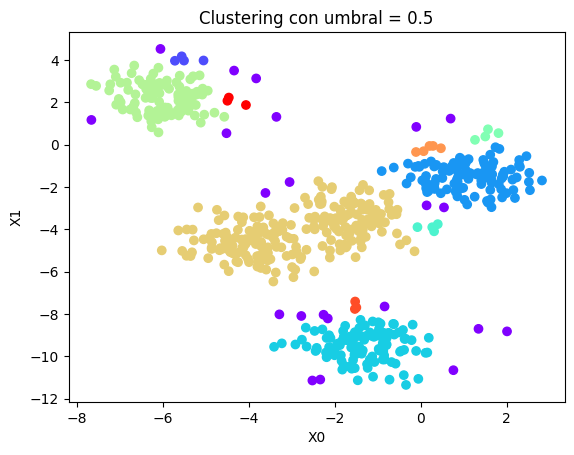

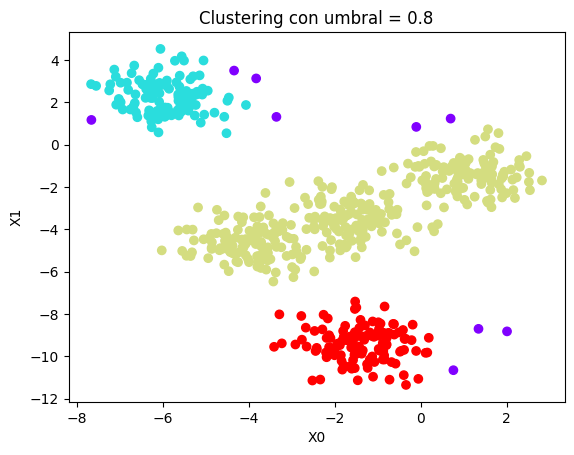

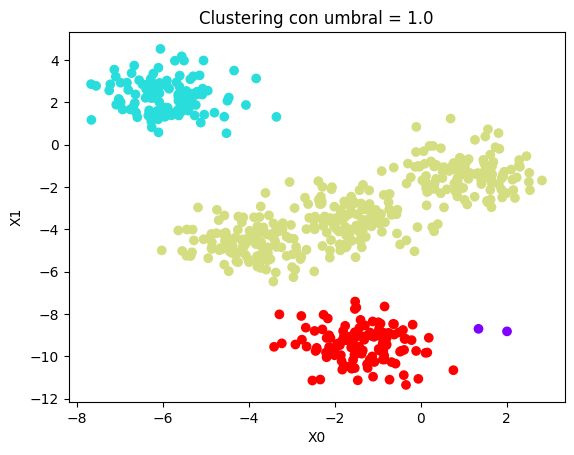

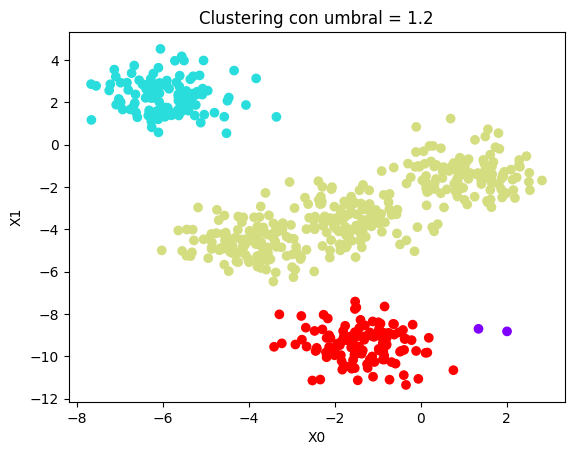

In [51]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

def knn_umbral_cluster(X, eps_val):
    clustering = DBSCAN(eps=eps_val, min_samples=3, metric='euclidean')
    labels = clustering.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    plt.title(f'Clustering con umbral = {eps_val}')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

# Probar con varios umbrales
for eps in [0.5, 0.8, 1.0, 1.2]:
    knn_umbral_cluster(X, eps)


**Ejercicio 2**

Usar el algoritmo de agrupación K-Nearest Neighbor y distancia Euclidean para agrupar los datos del ejercicio 3. Usar un umbral de 4.

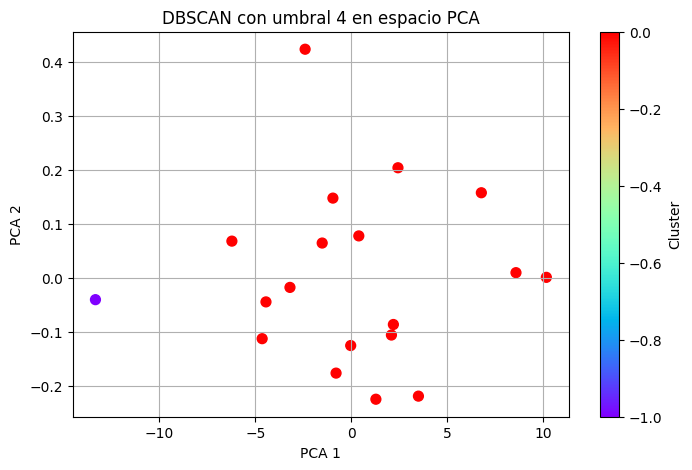

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
df = pd.read_excel('perfume_data.xlsx', index_col=0)
X = df.values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes para poder graficar en 2d
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DBSCAN con umbral 4 en el espacio escalado
dbscan = DBSCAN(eps=4, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

# Graficar clusters en espacio PCA
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.title('DBSCAN con umbral 4 en espacio PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


##DBSCAN


<Axes: xlabel='x', ylabel='y'>

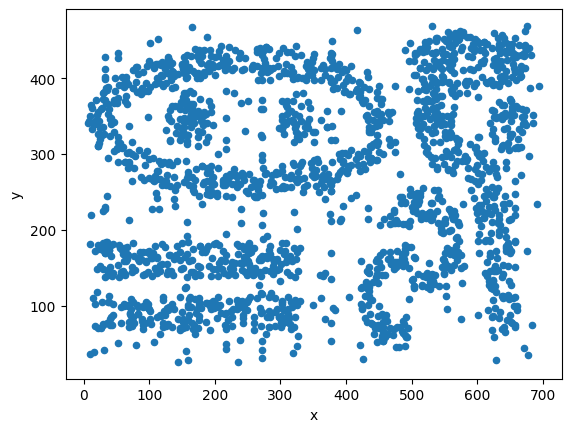

In [55]:
# Lectura del archivo chameleon
import pandas as pd

data = pd.read_csv('chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

<Axes: xlabel='x', ylabel='y'>

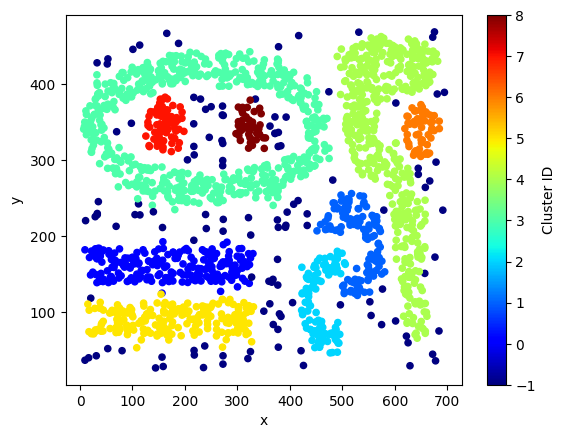

In [56]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

**Ejercicio 1**

Variar epsilon y min_samples.Analice los resultados.

**Ejercicio 2**

Aplicar el algoritmo DBScan a otro conjunto de datos. Analice los resultados variando epsilon y min_samples

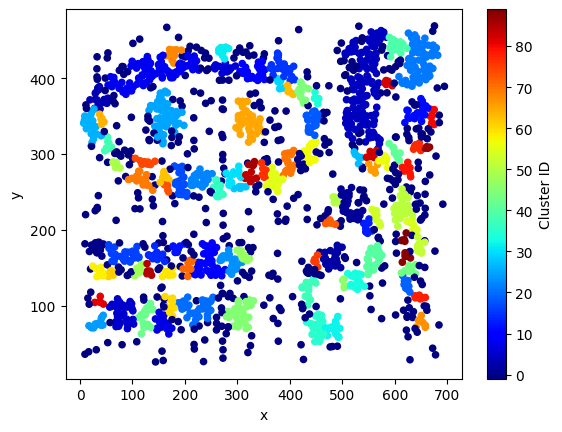

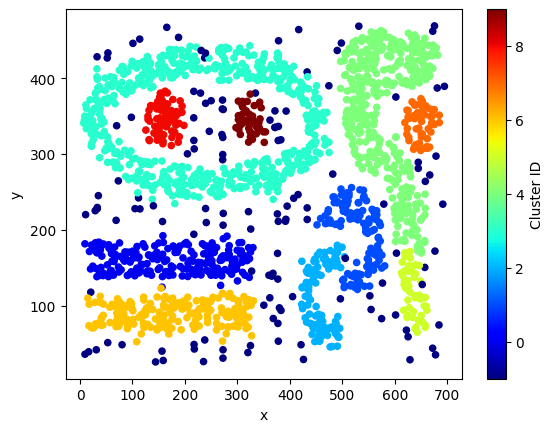

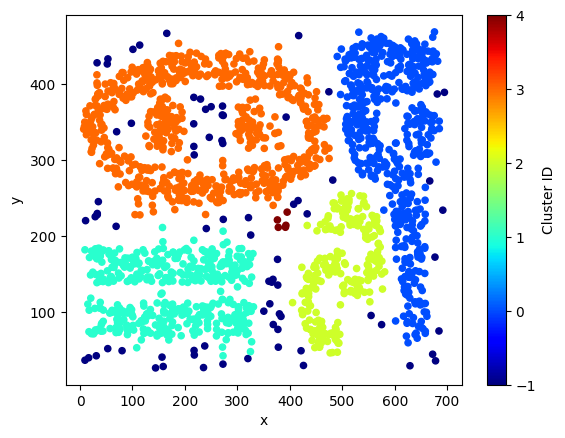

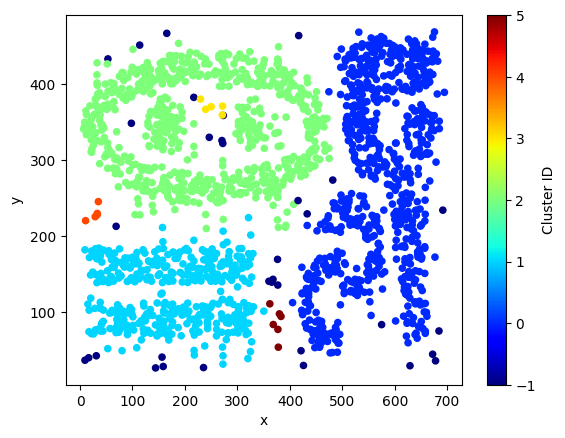

In [58]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = [10, 15, 20, 25]

for eps in eps_values:
  db = DBSCAN(eps, min_samples=5).fit(data)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
  result = pd.concat((data,labels), axis=1)
  result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')


Se observa que entra mayor sea epsilon, mas grandes seran los grupos que forma DBscan

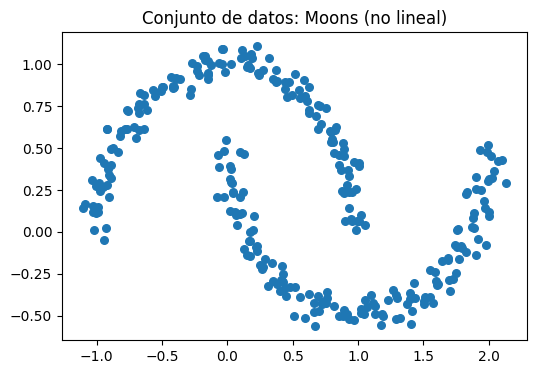

In [59]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Crear datos sintéticos
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Visualizar
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Conjunto de datos: Moons (no lineal)")
plt.show()


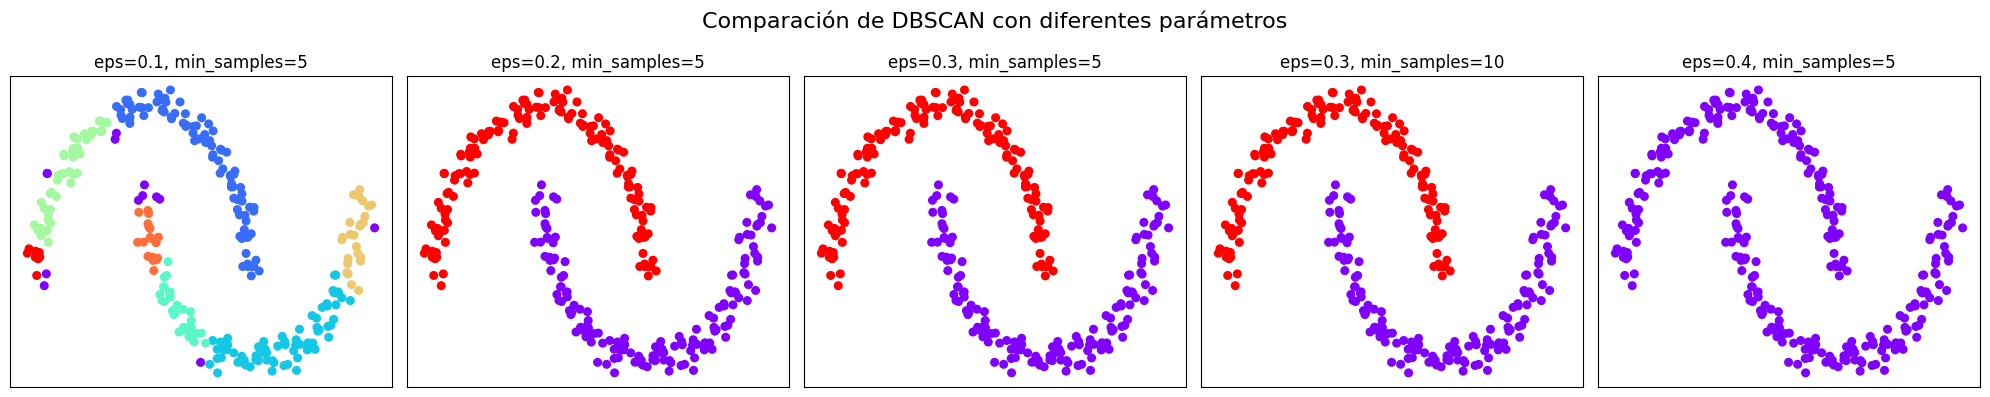

In [60]:
from sklearn.cluster import DBSCAN

# Lista de combinaciones (eps, min_samples)
parametros = [(0.1, 5), (0.2, 5), (0.3, 5), (0.3, 10), (0.4, 5)]

# Visualizar resultados
fig, axes = plt.subplots(1, len(parametros), figsize=(20, 4))

for i, (eps, min_samples) in enumerate(parametros):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)

    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=30)
    axes[i].set_title(f"eps={eps}, min_samples={min_samples}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.suptitle("Comparación de DBSCAN con diferentes parámetros", fontsize=16)
plt.tight_layout()
plt.show()


se observa que en este caso, un min de samples que sea alto hace que se necesiten mas vecinos para formar un cluster.

##Gaussian Mixture Model (GMM)

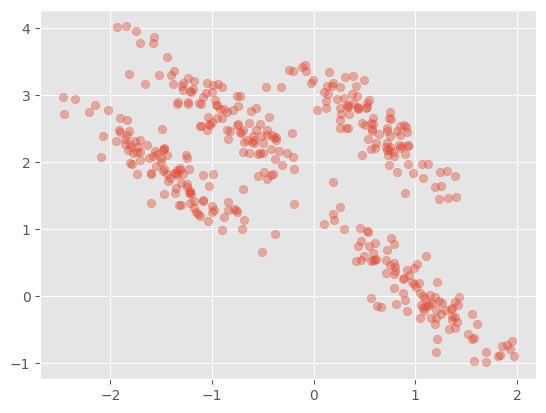

In [61]:
# Importamos librerías
import numpy as np
np.random.seed(0)
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Creamos un dataset sintético de cuatro clusters no circulares
X, _ = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X=np.dot(X, rng.randn(2, 2))

plt.scatter(X[:,0],X[:,1],alpha=0.4)

In [62]:

from sklearn.mixture import GaussianMixture

model=GaussianMixture(n_components=4, covariance_type='full', random_state=40)
model.fit(X)

GaussianMixture(n_components=4, random_state=40)

Text(0.5, 1.0, 'GMM')

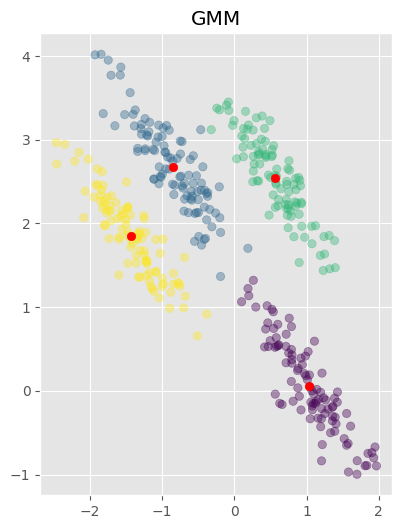

In [63]:
# Se dibujan los clusters obtenidos
plt.figure(figsize=(10,6))
pred2=model.predict(X)
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=pred2,alpha=0.4)
plt.scatter(model.means_[:,0],model.means_[:,1],c="r")
plt.title("GMM")

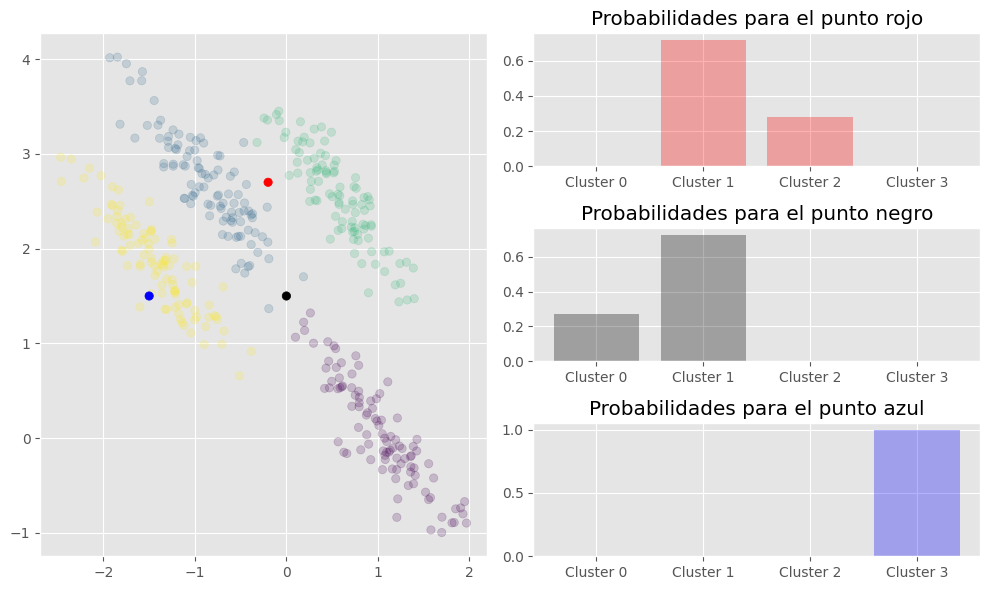

In [67]:
# En este ejmplo se visualizará la representación probabilística de tres puntos seleccionados:
# punto rojo, punto negro y punto azul (en la gráfica1). Se escogen estos puntos que se
# encuentran en la frontera con el fin de que pertenezcan a más de un cluster.

#Cambiar aqui la coordenada de los puntos y revisar el que se quiere evaluar

plt.figure(figsize=(10,6))
point=np.array([[-0.2,2.7],
                [0,1.5],
                [-1.5,1.5]])
probs=model.predict_proba(point)
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=pred2,alpha=0.2)
plt.scatter(point[:,0],point[:,1],c=["r","k","b"])
plt.subplot(322)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[0].flatten(), color="r", alpha=0.3)
plt.title("Probabilidades para el punto rojo")
plt.subplot(324)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[1].flatten(), color="k", alpha=0.3)
plt.title("Probabilidades para el punto negro")
plt.subplot(326)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[2].flatten(), color="b", alpha=0.3)
plt.title("Probabilidades para el punto azul")
plt.tight_layout()

In [65]:
point = np.array([[-1.5, 1.5]])
probs = model.predict_proba(point)
print(probs)


[[1.88453166e-14 9.28557460e-12 8.27286053e-49 1.00000000e+00]]


**Ejercicio 2**: ¿Cuáles serían las probabilidades para el punto (-1.5,1.5)?

**Ejercicio 3**: Ejecutar el algoritmo Kmean con este conjunto de datos. Comparar visualmente los resultados de los dos modelos.

**Ejercicio 4**: Aplicar DBScan al conjunto de datos


**Ejercicio 5 - Conclusiones**: Explicar y analizar los resultados de aplicar GMM,k-means y DBSCAN.



In [69]:
#Las probabilidades para el punto serian:
point = np.array([[-1.5, 1.5]])
probs = model.predict_proba(point)
print(probs)

[[1.88453166e-14 9.28557460e-12 8.27286053e-49 1.00000000e+00]]


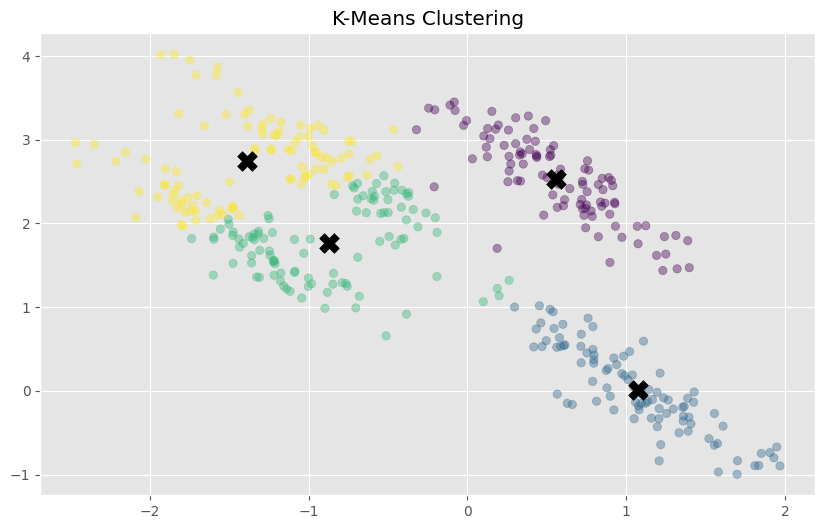

In [71]:
#Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, alpha=0.4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='X')
plt.title("K-Means Clustering")
plt.show()


GMM realizo un mejor trabajo en la separacion de clusters, ademas que posee distribuciones gaussianas.

Los datos que poseen formas elipticas e inclinadas funcionan mejor con GMM (modelacion de covars)


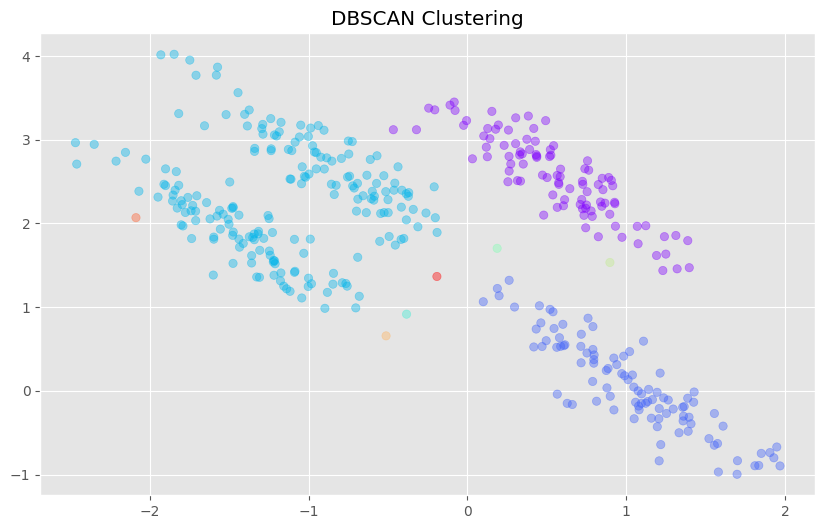

In [86]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.27, min_samples=1)
labels_db = dbscan.fit_predict(X)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_db, cmap='rainbow', alpha=0.4)
plt.title("DBSCAN Clustering")
plt.show()


En este tipo de datos, el mejor cluster es el GMM, pues Kmeans intenta agrupar formas esfericas y de tamaño parecido, mientras que DBSCAN hay que ajustarle los parametros y esto puede llegar a ser tedioso.

---------
**Referencias**

[1] TAN y otros. Introduction to Data Mining  (segunda edición)

[2] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.
